<a href="https://colab.research.google.com/github/IzavanCorreia/Deep_Learning_Project/blob/main/Projeto_Previs%C3%A3o_de_Defeitos_em_Software_Deep_Learning_Izavan_Correia1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
from scipy.io import arff
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, SimpleRNN, Conv1D, MaxPooling1D, Flatten
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report
from keras.utils import plot_model

**Explicação sobre a base de dados CM1:**

Essa base de dados, localizada em http://promise.site.uottawa.ca/SERepository/datasets/cm1.arff, é um conjunto de dados utilizado para análise e pesquisa na área de Engenharia de Software. A extensão ".arff" indica que o arquivo segue o formato ARFF (Attribute-Relation File Format), que é comumente usado em conjuntos de dados para mineração de dados e aprendizado de máquina.

A base de dados cm1.arff parece se concentrar em métricas de código-fonte do software CM1 (Component Maintenance and Interoperability), que é um dos 17 projetos do planejamento de Software Engineering Laboratory (SEL) da NASA. Este conjunto de dados é frequentemente utilizado em estudos de predição de defeitos de software.

As características típicas incluídas em conjuntos de dados como esse podem ser métricas de código-fonte, como número de linhas de código, complexidade ciclomática, número de chamadas de função, entre outras. Os rótulos ou classes podem indicar se um módulo de software está propenso a defeitos ou não.

O Component Maintenance and Interoperability (Manutenção e Interoperabilidade de Componentes) é um projeto específico no contexto do planejamento do Software Engineering Laboratory (SEL) da NASA. O SEL é responsável por conduzir pesquisas e desenvolver tecnologias para melhorar a qualidade, confiabilidade e eficiência do software utilizado em missões espaciais e outras atividades relacionadas à NASA.

O CM1, como parte desse projeto, concentra-se em questões relacionadas à manutenção e interoperabilidade de componentes de software. Isso significa que o projeto se dedica a desenvolver técnicas, práticas e ferramentas para garantir que os componentes de software utilizados em sistemas críticos da NASA sejam facilmente mantidos e possam interoperar efetivamente entre si.

A manutenção de software é uma atividade crucial, pois sistemas de software estão sujeitos a mudanças contínuas ao longo do tempo devido a correções de erros, atualizações de requisitos e evolução do ambiente. A interoperabilidade refere-se à capacidade dos componentes de software de diferentes sistemas de trabalharem juntos de forma eficaz e integrada.

Portanto, o CM1 pode estar envolvido no desenvolvimento de diretrizes, padrões, técnicas de desenvolvimento e ferramentas para garantir que os componentes de software utilizados pela NASA sejam robustos, fáceis de manter e capazes de funcionar harmoniosamente em conjunto para suportar as missões espaciais e outras atividades da agência.

In [ ]:
# Carregar o dataset do PROMISE repository
url = "http://promise.site.uottawa.ca/SERepository/datasets/cm1.arff"
response = requests.get(url)
data, meta = arff.loadarff(StringIO(response.text))

**Métricas de software da base de dados:**

1. loc: Lines of Code (número de linhas de código)

2. v(g): Cyclomatic Complexity (complexidade ciclomática)

3. ev(g): Essential Complexity (complexidade essencial)

4. iv(g): Design Complexity (complexidade de design)

5. n: Halstead's total number of operators and operands

6. v: Halstead's volume (volume de Halstead)

7. l: Halstead's program length (comprimento do programa)

8. d: Halstead's difficulty (dificuldade)

9. i: Halstead's intelligence (inteligência)

10. e: Halstead's effort (esforço)

11. b: Halstead's error estimate (estimativa de erro)

12. t: Time to program (tempo para programar)

13. lOCode: Lines of code (linhas de código)

14. lOComment: Lines of comments (linhas de comentários)

15. lOBlank: Lines of blank space (linhas em branco)

16. locCodeAndComment: Lines of code and comments (linhas de código e comentários)

17. uniq_Op: Unique operators (operadores únicos)

18. uniq_Opnd: Unique operands (operandos únicos)

19. total_Op: Total operators (total de operadores)

20. total_Opnd: Total operands (total de operandos)

21. branchCount: Number of branches (número de ramificações)

**Label:**
22. defects: Indicates the presence of defects (indica a presença de defeitos)


**Exemplo de uma linha aleatória da base de dados:**

24, 5, 1, 3, 63, 309.13, 0.11, 9.5, 32.54, 2936.77, 0.1, 163.15, 1, 0, 6, 0, 15, 15, 44, 19, 9, false


In [ ]:
# Converter o conjunto de dados para DataFrame do pandas
data = pd.DataFrame(data)

In [ ]:
# Salvar o DataFrame em um arquivo CSV
# data.to_csv('dataset_cm1.csv', index=False)

In [ ]:
# Salvar o DataFrame em um arquivo XLSX
# data.to_excel('dataset_cm1.xlsx', index=False)

In [ ]:
# Visualizar os primeiros registros do DataFrame
print("Visualização das primeiras linhas do DataFrame:")
print(data.head())

# Exibir informações sobre o dataset
print("\nInformações sobre o DataFrame:")
print(data.info())

Visualização das primeiras linhas do DataFrame:
    loc  v(g)  ev(g)  iv(g)     n       v     l      d      i        e  ...  \
0   1.1   1.4    1.4    1.4   1.3    1.30  1.30   1.30   1.30     1.30  ...   
1   1.0   1.0    1.0    1.0   1.0    1.00  1.00   1.00   1.00     1.00  ...   
2  24.0   5.0    1.0    3.0  63.0  309.13  0.11   9.50  32.54  2936.77  ...   
3  20.0   4.0    4.0    2.0  47.0  215.49  0.06  16.00  13.47  3447.89  ...   
4  24.0   6.0    6.0    2.0  72.0  346.13  0.06  17.33  19.97  5999.58  ...   

   lOCode  lOComment  lOBlank  locCodeAndComment  uniq_Op  uniq_Opnd  \
0     2.0        2.0      2.0                2.0      1.2        1.2   
1     1.0        1.0      1.0                1.0      1.0        1.0   
2     1.0        0.0      6.0                0.0     15.0       15.0   
3     0.0        0.0      3.0                0.0     16.0        8.0   
4     0.0        0.0      3.0                0.0     16.0       12.0   

   total_Op  total_Opnd  branchCount   defec

In [ ]:
# Ver o tamanho do conjunto de dados
# num_linhas = data.shape[0]
# num_colunas = data.shape[1]

#print(f'O conjunto de dados tem {num_linhas} linhas e {num_colunas} colunas.')

In [ ]:
# Pré-processar o dataset
X = data.drop(columns=['defects']).values
y = data['defects'].values

In [ ]:
# Codificar os rótulos
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [ ]:
# Normalizar os dados
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Balanceamento dos dados com SMOTE antes de dividir
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
# Dividir os dados balanceados
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
# Modelo 1: Rede Neural Densa
model_dense = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [ ]:
# Compilar o modelo denso
model_dense.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Treinar o modelo denso
history_dense = model_dense.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
23/23 [==============================] - 2s 18ms/step - loss: 0.8445 - accuracy: 0.5543 - val_loss: 0.6471 - val_accuracy: 0.7278
Epoch 2/50
23/23 [==============================] - 0s 6ms/step - loss: 0.7270 - accuracy: 0.6393 - val_loss: 0.6354 - val_accuracy: 0.7111
Epoch 3/50
23/23 [==============================] - 0s 6ms/step - loss: 0.6626 - accuracy: 0.6866 - val_loss: 0.6282 - val_accuracy: 0.6944
Epoch 4/50
23/23 [==============================] - 0s 5ms/step - loss: 0.6501 - accuracy: 0.6616 - val_loss: 0.6189 - val_accuracy: 0.7111
Epoch 5/50
23/23 [==============================] - 0s 5ms/step - loss: 0.6314 - accuracy: 0.6685 - val_loss: 0.6034 - val_accuracy: 0.7167
Epoch 6/50
23/23 [==============================] - 0s 5ms/step - loss: 0.6110 - accuracy: 0.6908 - val_loss: 0.5946 - val_accuracy: 0.7278
Epoch 7/50
23/23 [==============================] - 0s 5ms/step - loss: 0.5762 - accuracy: 0.7019 - val_loss: 0.5847 - val_accuracy: 0.7278
Epoch 8/50
23/23 [=

In [ ]:
# Avaliar o modelo denso
loss_dense, accuracy_dense = model_dense.evaluate(X_test, y_test)
print(f'Acurácia do modelo denso: {accuracy_dense * 100:.2f}%')
print(f'Erro do modelo denso: {loss_dense * 100:.2f}%')

6/6 [==============================] - 0s 6ms/step - loss: 0.3032 - accuracy: 0.8722
Acurácia do modelo denso: 87.22%
Erro do modelo denso: 30.32%


In [ ]:
# Fazer a previsão usando o modelo denso
prediction_dense = model_dense.predict(X_test)
predicted_classes_dense = (prediction_dense > 0.5).astype("int32")

6/6 [==============================] - 0s 2ms/step


In [ ]:
# Exibir a matriz de confusão e o relatório de classificação do modelo denso
print("Modelo Denso - Matriz de Confusão:")
print(confusion_matrix(y_test, predicted_classes_dense))

Modelo Denso - Matriz de Confusão:
[[79 17]
 [ 6 78]]


In [ ]:
# Relatório de classificação
print("Modelo Denso - Relatório de Classificação:")
print(classification_report(y_test, predicted_classes_dense))

Modelo Denso - Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.93      0.82      0.87        96
           1       0.82      0.93      0.87        84

    accuracy                           0.87       180
   macro avg       0.88      0.88      0.87       180
weighted avg       0.88      0.87      0.87       180



In [ ]:
# Comparar previsões com rótulos verdadeiros
comparison = pd.DataFrame({'True Label': encoder.inverse_transform(y_test.ravel()), 'Predicted Label': encoder.inverse_transform(predicted_classes_dense.ravel())})
print("\nComparação entre Rótulos Verdadeiros e Previsões:")
print(comparison)


Comparação entre Rótulos Verdadeiros e Previsões:
    True Label Predicted Label
0     b'false'        b'false'
1      b'true'         b'true'
2     b'false'        b'false'
3      b'true'         b'true'
4     b'false'         b'true'
..         ...             ...
175    b'true'         b'true'
176   b'false'        b'false'
177   b'false'        b'false'
178   b'false'        b'false'
179   b'false'        b'false'

[180 rows x 2 columns]


In [ ]:
model_dense.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2816      
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

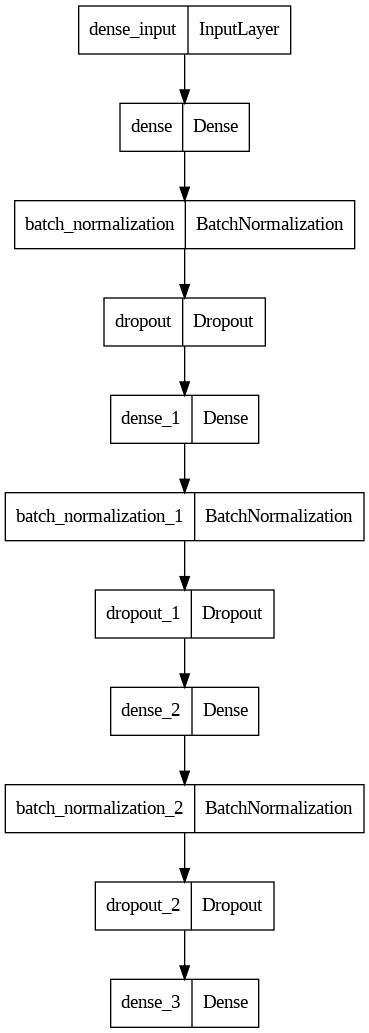

In [ ]:
plot_model(model_dense, to_file='modeldense.png')

In [ ]:
# Preparar os dados para a RNN (adiciona uma dimensão de tempo)
X_train_rnn = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_rnn = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
# Modelo 2: Rede Neural Recorrente
model_rnn = Sequential([
    SimpleRNN(128, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2]), activation='relu', return_sequences=True),
    BatchNormalization(),
    Dropout(0.5),
    SimpleRNN(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [ ]:
# Compilar o modelo RNN
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Treinar o modelo RNN
history_rnn = model_rnn.fit(X_train_rnn, y_train, epochs=50, batch_size=32, validation_data=(X_test_rnn, y_test))

Epoch 1/50
23/23 [==============================] - 4s 24ms/step - loss: 0.8049 - accuracy: 0.6003 - val_loss: 0.6343 - val_accuracy: 0.6389
Epoch 2/50
23/23 [==============================] - 0s 7ms/step - loss: 0.7404 - accuracy: 0.6156 - val_loss: 0.6134 - val_accuracy: 0.6556
Epoch 3/50
23/23 [==============================] - 0s 6ms/step - loss: 0.7133 - accuracy: 0.6379 - val_loss: 0.5972 - val_accuracy: 0.6833
Epoch 4/50
23/23 [==============================] - 0s 6ms/step - loss: 0.6909 - accuracy: 0.6421 - val_loss: 0.5878 - val_accuracy: 0.6944
Epoch 5/50
23/23 [==============================] - 0s 6ms/step - loss: 0.6478 - accuracy: 0.6685 - val_loss: 0.5805 - val_accuracy: 0.7222
Epoch 6/50
23/23 [==============================] - 0s 7ms/step - loss: 0.6345 - accuracy: 0.6657 - val_loss: 0.5762 - val_accuracy: 0.7444
Epoch 7/50
23/23 [==============================] - 0s 6ms/step - loss: 0.6319 - accuracy: 0.6880 - val_loss: 0.5672 - val_accuracy: 0.7556
Epoch 8/50
23/23 [=

In [ ]:
# Avaliar o modelo RNN
loss_rnn, accuracy_rnn = model_rnn.evaluate(X_test_rnn, y_test)
print(f'Acurácia do modelo RNN: {accuracy_rnn * 100:.2f}%')
print(f'Erro do modelo RNN: {loss_rnn * 100:.2f}%')

6/6 [==============================] - 0s 4ms/step - loss: 0.3206 - accuracy: 0.8667
Acurácia do modelo RNN: 86.67%
Erro do modelo RNN: 32.06%


In [ ]:
# Fazer a previsão usando o modelo RNN
prediction_rnn = model_rnn.predict(X_test_rnn)
predicted_classes_rnn = (prediction_rnn > 0.5).astype("int32")

6/6 [==============================] - 0s 3ms/step


In [ ]:
# Exibir a matriz de confusão e o relatório de classificação do modelo RNN
print("Modelo RNN - Matriz de Confusão:")
print(confusion_matrix(y_test, predicted_classes_rnn))

Modelo RNN - Matriz de Confusão:
[[75 21]
 [ 3 81]]


In [ ]:
# Relatório de classificação
print("Modelo RNN - Relatório de Classificação:")
print(classification_report(y_test, predicted_classes_rnn))

Modelo RNN - Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.96      0.78      0.86        96
           1       0.79      0.96      0.87        84

    accuracy                           0.87       180
   macro avg       0.88      0.87      0.87       180
weighted avg       0.88      0.87      0.87       180



In [ ]:
# Comparar previsões com rótulos verdadeiros
comparison = pd.DataFrame({'True Label': encoder.inverse_transform(y_test.ravel()), 'Predicted Label': encoder.inverse_transform(predicted_classes_rnn.ravel())})
print("\nComparação entre Rótulos Verdadeiros e Previsões:")
print(comparison)


Comparação entre Rótulos Verdadeiros e Previsões:
    True Label Predicted Label
0     b'false'        b'false'
1      b'true'         b'true'
2     b'false'        b'false'
3      b'true'         b'true'
4     b'false'         b'true'
..         ...             ...
175    b'true'         b'true'
176   b'false'        b'false'
177   b'false'         b'true'
178   b'false'        b'false'
179   b'false'        b'false'

[180 rows x 2 columns]


In [ ]:
model_rnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1, 128)            19200     
                                                                 
 batch_normalization_3 (Bat  (None, 1, 128)            512       
 chNormalization)                                                
                                                                 
 dropout_3 (Dropout)         (None, 1, 128)            0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 64)                12352     
                                                                 
 batch_normalization_4 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dropout_4 (Dropout)         (None, 64)               

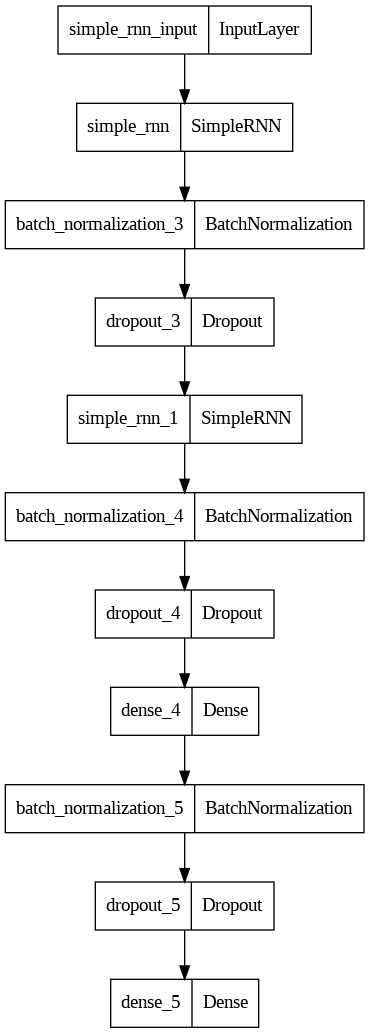

In [ ]:
plot_model(model_rnn, to_file='modelrnn.png')

In [ ]:
# Preparar os dados para a CNN (adiciona uma dimensão de tempo)
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [ ]:
# Modelo 3: Rede Neural Convolucional
model_cnn = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2])),
    MaxPooling1D(pool_size=2),
    BatchNormalization(),
    Dropout(0.5),
    Conv1D(32, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    BatchNormalization(),
    Dropout(0.5),
    Flatten(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [ ]:
# Compilar o modelo CNN
model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Treinar o modelo CNN
history_cnn = model_cnn.fit(X_train_cnn, y_train, epochs=50, batch_size=32, validation_data=(X_test_cnn, y_test))

Epoch 1/50
23/23 [==============================] - 3s 21ms/step - loss: 0.8919 - accuracy: 0.5320 - val_loss: 0.6858 - val_accuracy: 0.5333
Epoch 2/50
23/23 [==============================] - 0s 7ms/step - loss: 0.7840 - accuracy: 0.5850 - val_loss: 0.6794 - val_accuracy: 0.5333
Epoch 3/50
23/23 [==============================] - 0s 7ms/step - loss: 0.7026 - accuracy: 0.6351 - val_loss: 0.6786 - val_accuracy: 0.5389
Epoch 4/50
23/23 [==============================] - 0s 8ms/step - loss: 0.7348 - accuracy: 0.6476 - val_loss: 0.6752 - val_accuracy: 0.5389
Epoch 5/50
23/23 [==============================] - 0s 8ms/step - loss: 0.7052 - accuracy: 0.6212 - val_loss: 0.6717 - val_accuracy: 0.5667
Epoch 6/50
23/23 [==============================] - 0s 8ms/step - loss: 0.6576 - accuracy: 0.6476 - val_loss: 0.6726 - val_accuracy: 0.5389
Epoch 7/50
23/23 [==============================] - 0s 9ms/step - loss: 0.6560 - accuracy: 0.6421 - val_loss: 0.6738 - val_accuracy: 0.5333
Epoch 8/50
23/23 [=

In [ ]:
# Avaliar o modelo CNN
loss_cnn, accuracy_cnn = model_cnn.evaluate(X_test_cnn, y_test)
print(f'Acurácia do modelo CNN: {accuracy_cnn * 100:.2f}%')
print(f'Erro do modelo CNN: {loss_cnn * 100:.2f}%')

6/6 [==============================] - 0s 7ms/step - loss: 0.4869 - accuracy: 0.7833
Acurácia do modelo CNN: 78.33%
Erro do modelo CNN: 48.69%


In [ ]:
# Fazer a previsão usando o modelo CNN
prediction_cnn = model_cnn.predict(X_test_cnn)
predicted_classes_cnn = (prediction_cnn > 0.5).astype("int32")

6/6 [==============================] - 0s 5ms/step


In [ ]:
# Exibir a matriz de confusão e o relatório de classificação do modelo CNN
print("Modelo CNN - Matriz de Confusão:")
print(confusion_matrix(y_test, predicted_classes_cnn))

Modelo CNN - Matriz de Confusão:
[[68 28]
 [11 73]]


In [ ]:
# Relatório de classificação
print("Modelo CNN - Relatório de Classificação:")
print(classification_report(y_test, predicted_classes_cnn))

Modelo CNN - Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.86      0.71      0.78        96
           1       0.72      0.87      0.79        84

    accuracy                           0.78       180
   macro avg       0.79      0.79      0.78       180
weighted avg       0.80      0.78      0.78       180



In [ ]:
# Comparar previsões com rótulos verdadeiros
comparison = pd.DataFrame({'True Label': encoder.inverse_transform(y_test.ravel()), 'Predicted Label': encoder.inverse_transform(predicted_classes_cnn.ravel())})
print("\nComparação entre Rótulos Verdadeiros e Previsões:")
print(comparison)


Comparação entre Rótulos Verdadeiros e Previsões:
    True Label Predicted Label
0     b'false'        b'false'
1      b'true'         b'true'
2     b'false'        b'false'
3      b'true'         b'true'
4     b'false'         b'true'
..         ...             ...
175    b'true'         b'true'
176   b'false'        b'false'
177   b'false'        b'false'
178   b'false'         b'true'
179   b'false'        b'false'

[180 rows x 2 columns]


In [ ]:
model_cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 19, 64)            256       
                                                                 
 max_pooling1d (MaxPooling1  (None, 9, 64)             0         
 D)                                                              
                                                                 
 batch_normalization_6 (Bat  (None, 9, 64)             256       
 chNormalization)                                                
                                                                 
 dropout_6 (Dropout)         (None, 9, 64)             0         
                                                                 
 conv1d_1 (Conv1D)           (None, 7, 32)             6176      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 3, 32)            

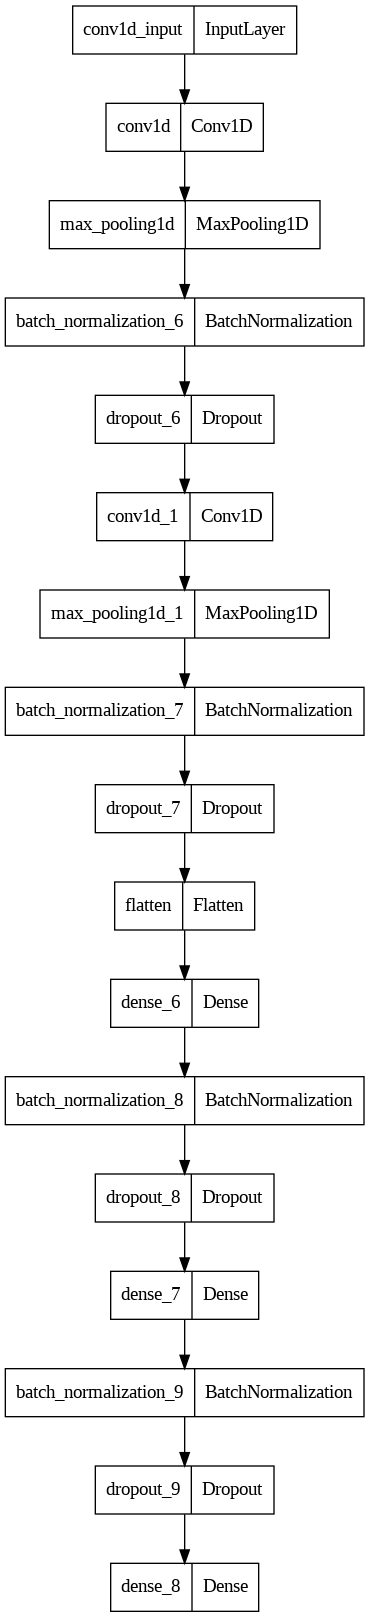

In [ ]:
plot_model(model_cnn, to_file='modelcnn.png')

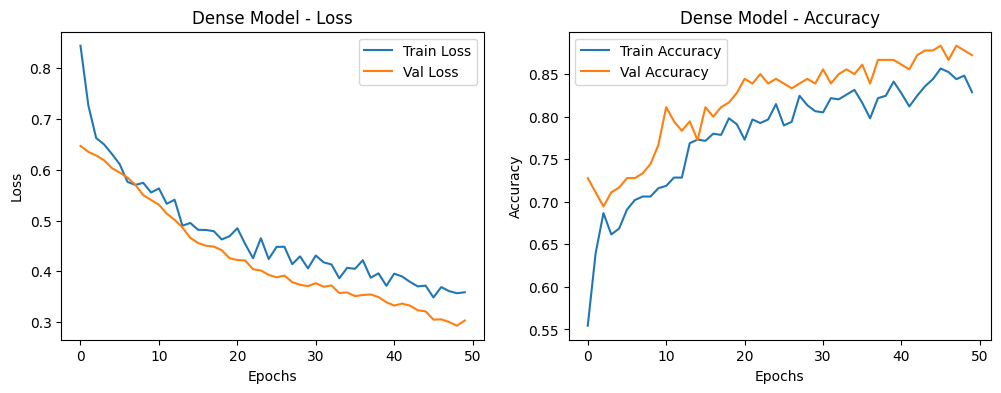

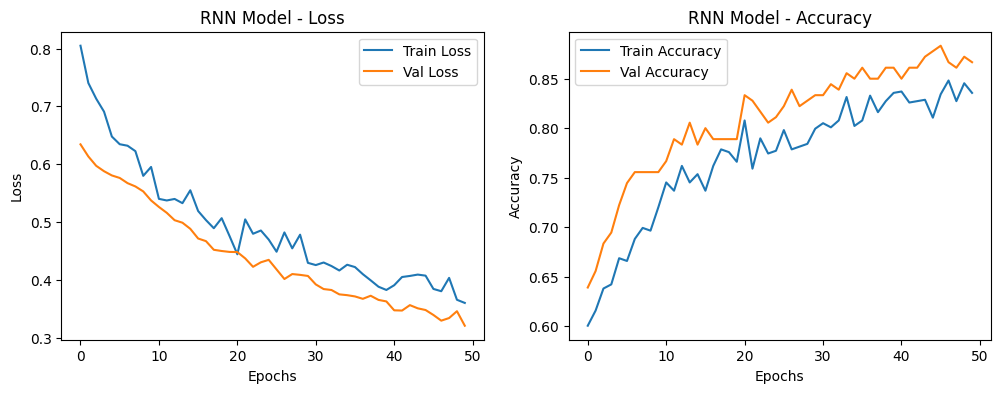

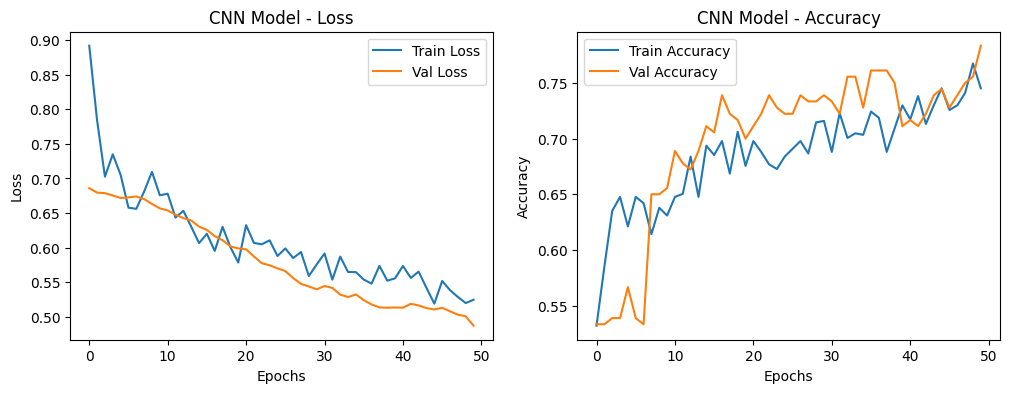

In [ ]:
# Função para plotar o histórico de treinamento
def plot_training_history(history, title):
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    # Plotar loss
    axs[0].plot(history.history['loss'], label='Train Loss')
    axs[0].plot(history.history['val_loss'], label='Val Loss')
    axs[0].set_title(f'{title} - Loss')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Loss')
    axs[0].legend()

    # Plotar accuracy
    axs[1].plot(history.history['accuracy'], label='Train Accuracy')
    axs[1].plot(history.history['val_accuracy'], label='Val Accuracy')
    axs[1].set_title(f'{title} - Accuracy')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('Accuracy')
    axs[1].legend()

    plt.show()

# Plotar os históricos de treinamento
plot_training_history(history_dense, 'Dense Model')
plot_training_history(history_rnn, 'RNN Model')
plot_training_history(history_cnn, 'CNN Model')